In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\Sai Pavithra Adoni\OneDrive\Desktop\Data Science\Projects\water-quality.csv")


In [3]:
data.head()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Sample ID         1048575 non-null  int64  
 1   Grab ID           733616 non-null   float64
 2   Profile ID        1048575 non-null  int64  
 3   Sample Number     1048575 non-null  object 
 4   Collect DateTime  1048575 non-null  object 
 5   Depth (m)         733616 non-null   float64
 6   Site Type         1048575 non-null  object 
 7   Area              1048517 non-null  object 
 8   Locator           1048575 non-null  object 
 9   Site              1048575 non-null  object 
 10  Parameter         1048575 non-null  object 
 11  Value             958199 non-null   float64
 12  Units             1047927 non-null  object 
 13  QualityId         1048575 non-null  int64  
 14  Lab Qualifier     123122 non-null   object 
 15  MDL               503334 non-null   float64
 16  

In [5]:
data.size

26214375

In [6]:
data.isnull().sum()

Sample ID                 0
Grab ID              314959
Profile ID                0
Sample Number             0
Collect DateTime          0
Depth (m)            314959
Site Type                 0
Area                     58
Locator                   0
Site                      0
Parameter                 0
Value                 90376
Units                   648
QualityId                 0
Lab Qualifier        925453
MDL                  545241
RDL                  546431
Text Value           855363
Sample Info         1046060
Steward Note        1048021
Replicates          1047254
Replicate Of        1047315
Method               160821
Date Analyzed        584002
Data Source               0
dtype: int64

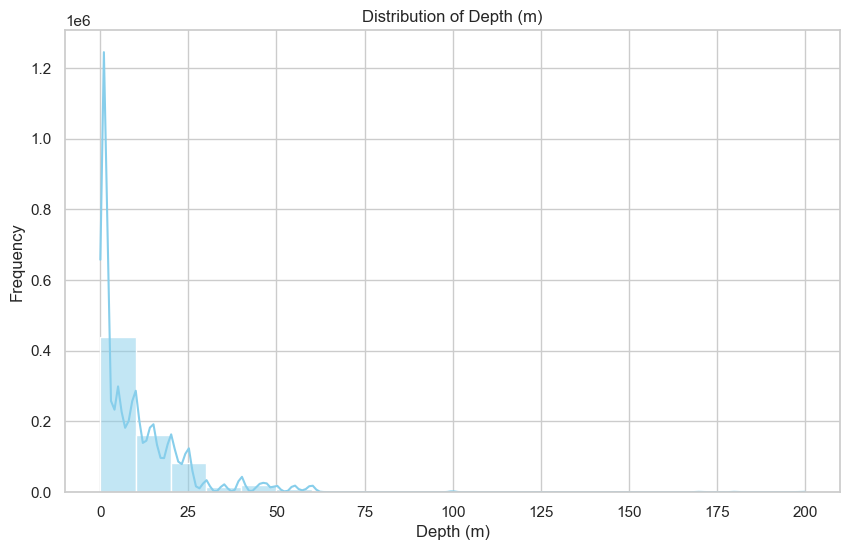

In [7]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution of 'Depth (m)'
plt.figure(figsize=(10, 6))
sns.histplot(data['Depth (m)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')
plt.show()



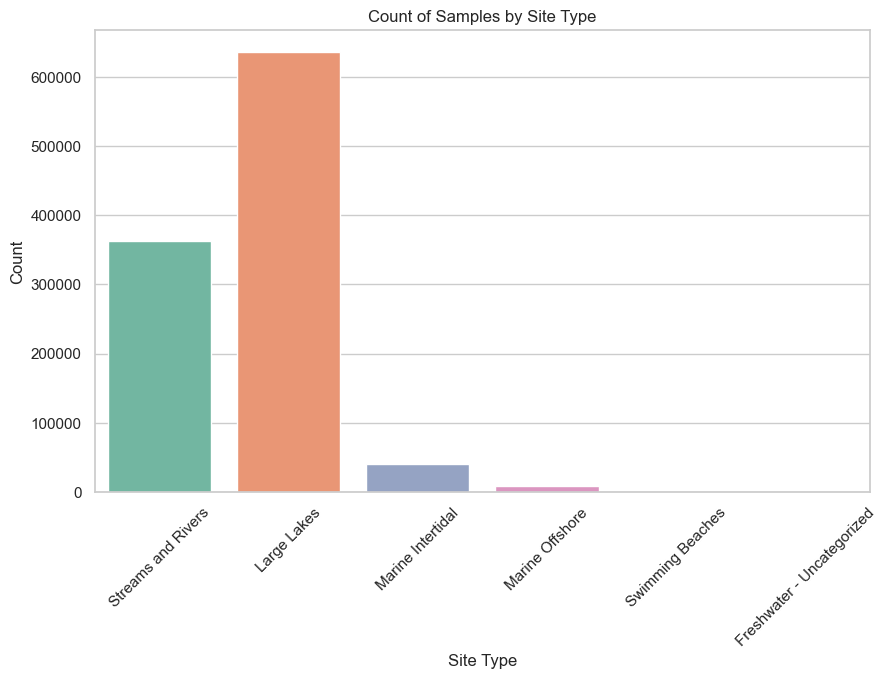

In [8]:
# Plotting a count plot for 'Site Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Site Type', hue='Site Type', palette='Set2', legend=False)
plt.title('Count of Samples by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


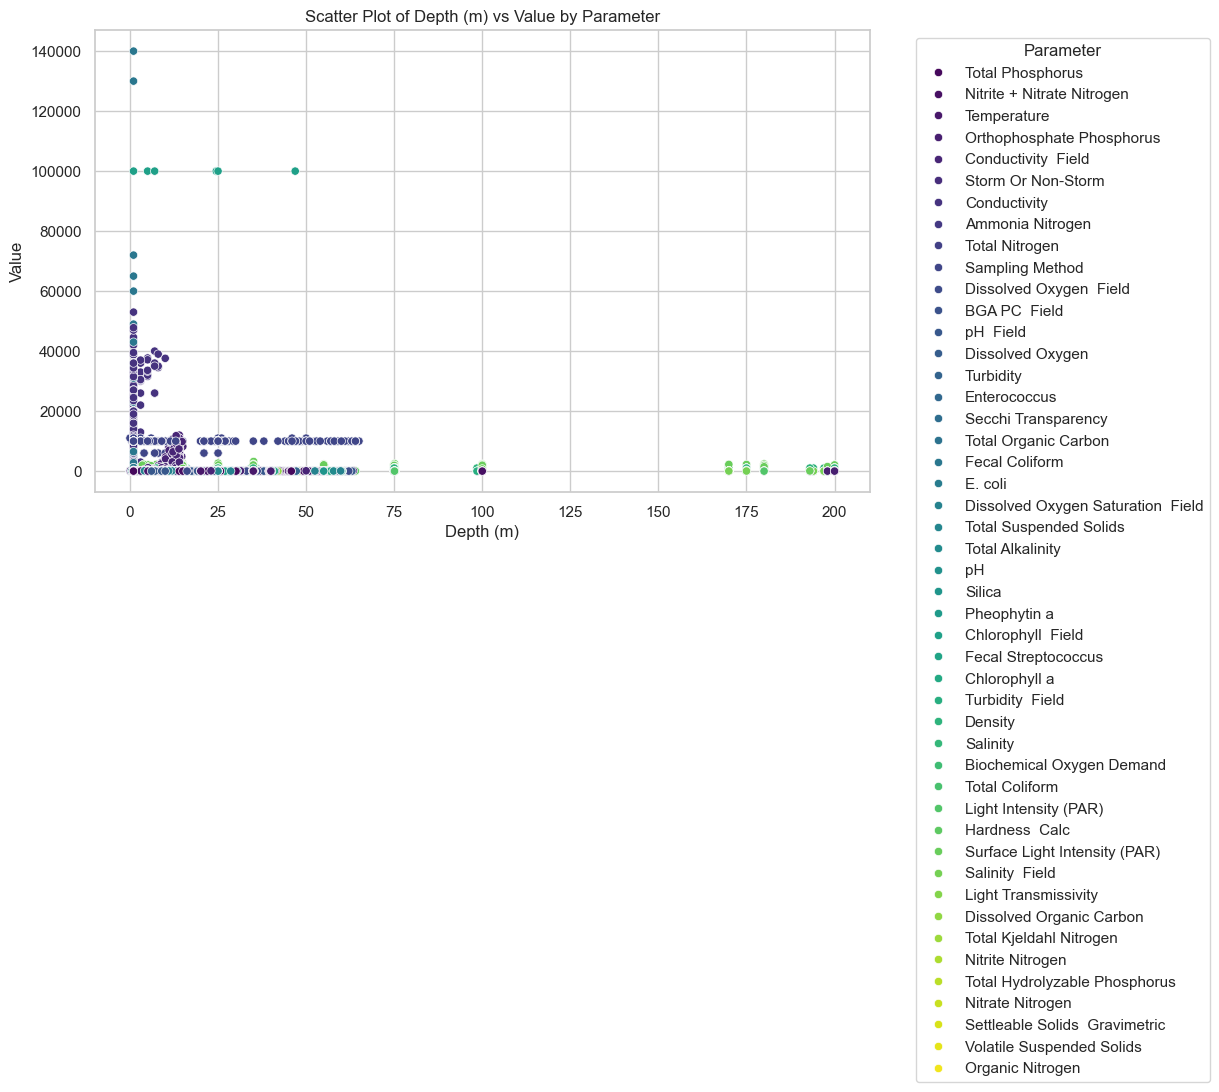

In [9]:
# Plotting a scatter plot for 'Depth (m)' vs 'Value' by 'Parameter'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Depth (m)', y='Value', hue='Parameter', palette='viridis')
plt.title('Scatter Plot of Depth (m) vs Value by Parameter')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

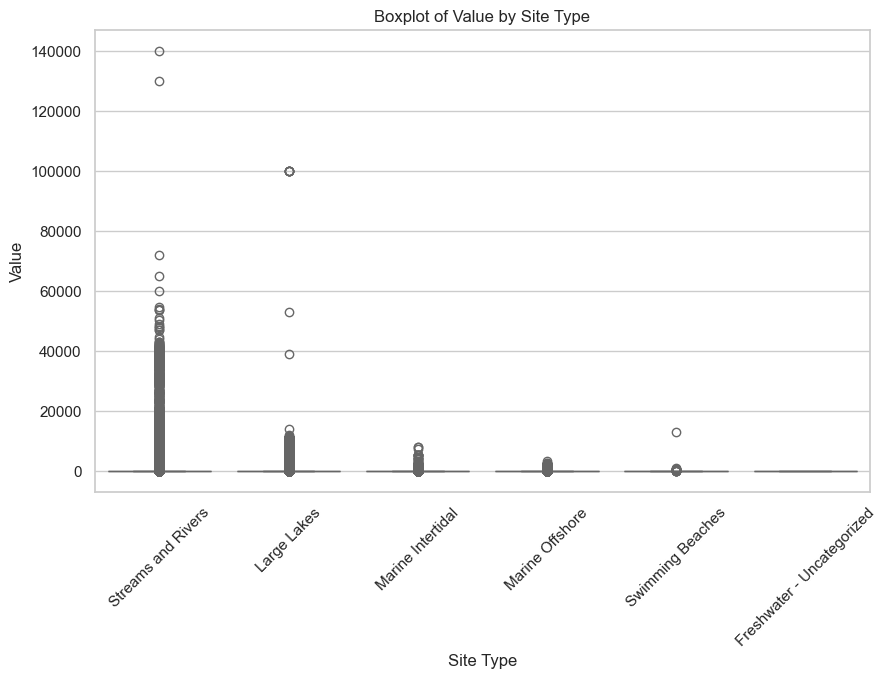

In [10]:
# Plotting a boxplot for 'Value' by 'Site Type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Site Type', y='Value', hue='Site Type', palette='Set3', legend=False)
plt.title('Boxplot of Value by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


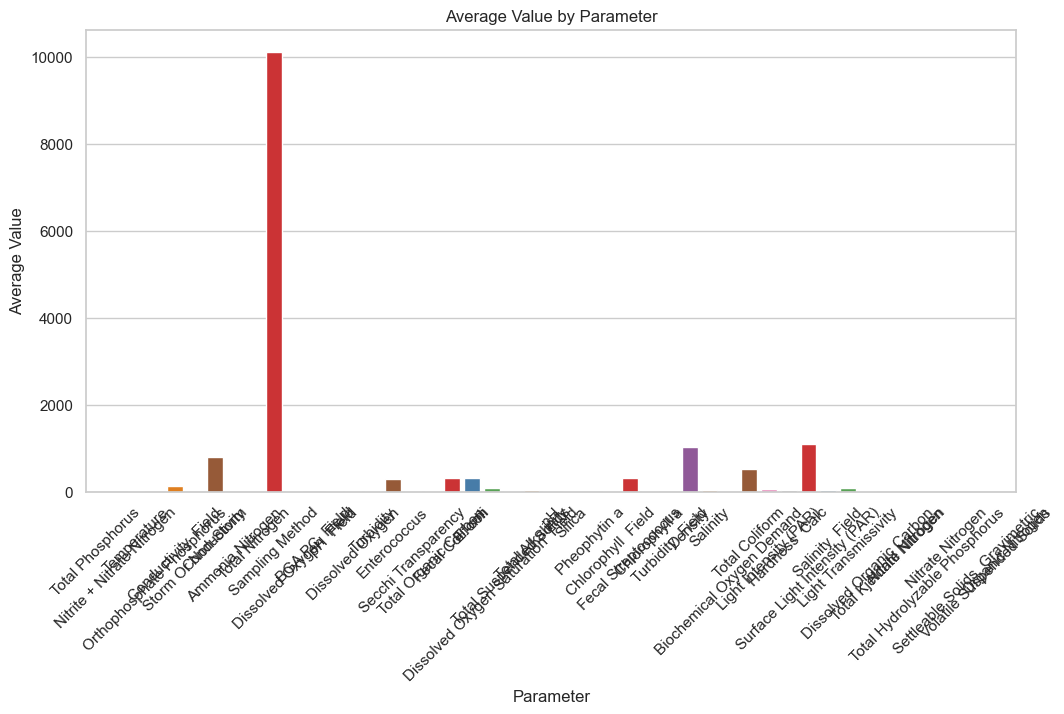

In [11]:
# Plotting a barplot for average 'Value' by 'Parameter'
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Parameter', y='Value', hue='Parameter', palette='Set1', errorbar=None, legend=False)
plt.title('Average Value by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

Effect of season on temperature of different water bodies

C:\Users\Sai Pavithra Adoni\AppData\Local\Temp\ipykernel_17992\583538717.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Collect DateTime'] = pd.to_datetime(data['Collect DateTime'])


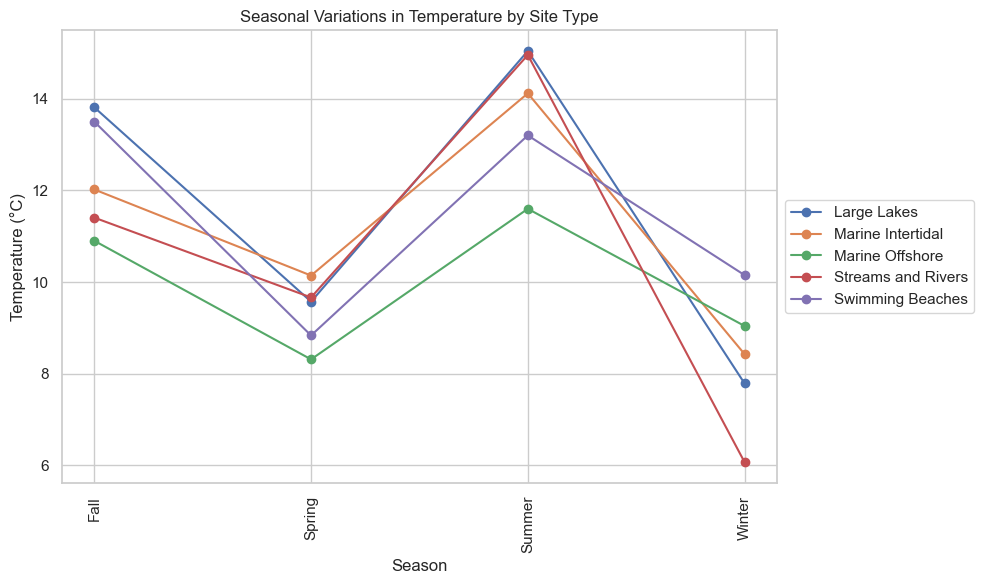

In [12]:
data['Collect DateTime'] = pd.to_datetime(data['Collect DateTime'])

# Extract month from 'Collect DateTime' to represent seasons
data['Season'] = data['Collect DateTime'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
                                                        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 
                                                        9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
numeric_columns = ['Value']  # Add more columns as needed
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group data by 'Site Type' and 'Season'
temperature_data = data[data['Parameter'] == 'Temperature'].groupby(['Site Type', 'Season']).agg({'Value': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
for site_type in temperature_data['Site Type'].unique():
    site_type_data = temperature_data[temperature_data['Site Type'] == site_type]
    plt.plot(site_type_data['Season'], site_type_data['Value'], marker='o', label=site_type)
plt.title('Seasonal Variations in Temperature by Site Type')
plt.ylabel('Temperature (°C)')
plt.xlabel('Season')
plt.xticks(rotation=90)  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.tight_layout()
plt.show()

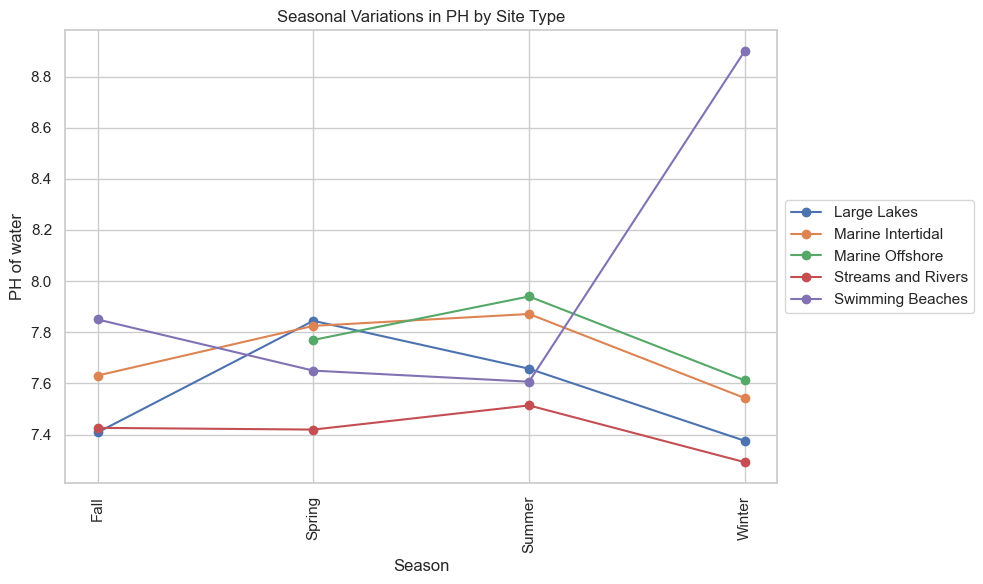

In [20]:

ph = data[data['Parameter'] == 'pH  Field'].groupby(['Site Type', 'Season']).agg({'Value': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
for site_type in ph['Site Type'].unique():
    site_type_data = ph[ph['Site Type'] == site_type]
    plt.plot(site_type_data['Season'], site_type_data['Value'], marker='o', label=site_type)
plt.title('Seasonal Variations in PH by Site Type')
plt.ylabel('PH of water')
plt.xlabel('Season')
plt.xticks(rotation=90)  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.tight_layout()
plt.show()